In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)

css_styling()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

### Loading VGG16 model

In [5]:
model = VGG16(weights="imagenet", include_top=True)  # loads the full model, including the softmax layer

In [6]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Creating a model modifier

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.activations import linear

In [8]:
LAYER_NAME = "block5_conv3"

In [9]:
def model_modifier(model):
    target_layer = model.get_layer(name=LAYER_NAME)
    target_activations = Model(inputs=model.inputs, outputs=target_layer.output)
    target_activations.layers[-1].activations = linear
    
    return target_activations

### Create Activation maximization

In [10]:
from tf_keras_vis.activation_maximization import ActivationMaximization

In [11]:
activation_maximization = ActivationMaximization(
    model=model,
    model_modifier=model_modifier,
    clone=False,
)

In [27]:
filter_num = 7

def loss(output):
    output[..., filter_num]


In [30]:
%%time
from tf_keras_vis.utils.callbacks import Print

activation = activation_maximization(loss, callbacks=[Print(interval=50)])
image = activation[0].astype(np.uint8)

<timed exec>:3: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.


ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

### Visualization with GradCam

In [12]:
from tensorflow.keras.preprocessing import image

In [22]:
image_names = ["jaguar", "tiger", "leopard"]
img_j = image.load_img("./src/jaguar.jpg", target_size=(224, 224))
img_l = image.load_img("./src/leopard2.jpg", target_size=(224, 224))
img_t = image.load_img("./src/tiger2.jpg", target_size=(224, 224))

images = np.asarray([np.array(img_j), np.array(img_l), np.array(img_t)])

In [24]:
X = preprocess_input(images)

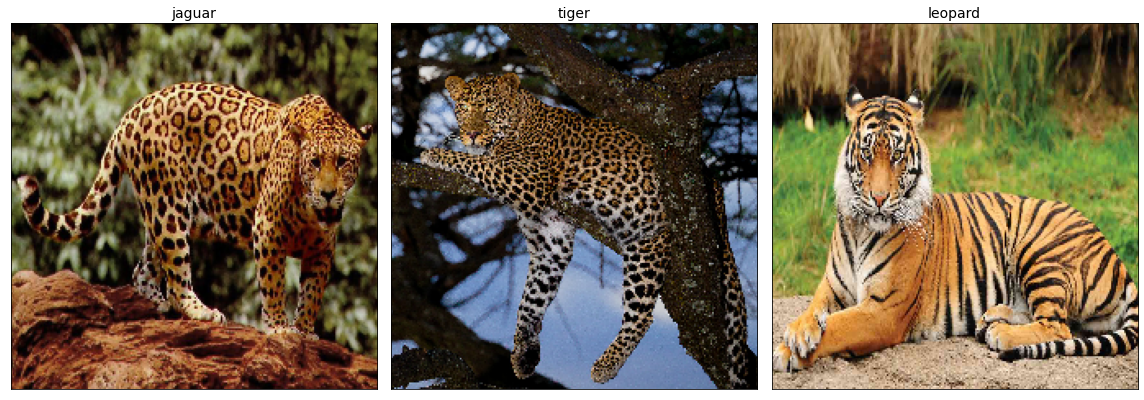

In [29]:
subplot_args = {
    "nrows": 1,
    "ncols": 3,
    "figsize": (16, 9),
    "subplot_kw": {"xticks": [], "yticks": []}
}

fig, ax = plt.subplots(**subplot_args)

for i, title in enumerate(image_names):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(images[i])

plt.tight_layout()
plt.show()